In [1]:
#Import Library yang dibutuhkan
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
#Mount Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#Masukkan path dataset yang disimpan di GDrive
dataset_path = '/content/drive/MyDrive/MRI/DatasetMRI'  # Sesuaikan dengan path ke dataset kamu

train_dir = os.path.join(dataset_path, 'train') #Ganti sesuai nama folder
validation_dir = os.path.join(dataset_path, 'validation')
test_dir = os.path.join(dataset_path, 'test')


In [ ]:
img_height, img_width = 224, 224
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.1,
    horizontal_flip=True,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2]
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 1056 images belonging to 2 classes.
Found 132 images belonging to 2 classes.
Found 132 images belonging to 2 classes.


In [ ]:
# Membangun Model MobileNet
# Load arsitektur MobileNetV2 tanpa top layer (include_top=False)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
base_model_mobilenet = MobileNetV2(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))
x = base_model_mobilenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(2, activation='softmax')(x)  # 2 kelas: Normal dan Adenocarcinoma
model_mobilenet = Model(inputs=base_model_mobilenet.input, outputs=predictions)

for layer in base_model_mobilenet.layers[-20:]:  # Unfreeze
    layer.trainable = True

# Compile model
model_mobilenet.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning Rate Scheduler
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

# Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Latih model mobilenet
history_mobilenet = model_mobilenet.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[reduce_lr, early_stopping]
)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 405s 9s/step - accuracy: 0.8714 - loss: 0.3948 - val_accuracy: 0.5078 - val_loss: 55.7860 - learning_rate: 0.0010
Epoch 2/30


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.2500 - val_loss: 81.9526 - learning_rate: 0.0010
Epoch 3/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 253s 7s/step - accuracy: 0.9991 - loss: 0.0091 - val_accuracy: 0.4922 - val_loss: 55.6115 - learning_rate: 0.0010
Epoch 4/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.7500 - val_loss: 33.9633 - learning_rate: 0.0010
Epoch 5/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 255s 8s/step - accuracy: 0.9755 - loss: 0.0655 - val_accuracy: 0.5000 - val_loss: 88.5474 - learning_rate: 0.0010
Epoch 6/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 88.0323 - learning_rate: 0.0010
Epoch 7/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 243s 7s/step - accuracy: 0.9887 - loss: 0.0328 - val_accuracy: 0.5156 - val_loss: 48.9212 - learning_rate: 0.0010
Epoch 8/30
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0000e+00 - los

In [ ]:
# Load arsitektur DenseNet121 tanpa top layer (include_top=False)
base_model_densenet = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Tambahkan layer baru di atasnya
x = base_model_densenet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)  # Menambahkan Dropout untuk mengurangi overfitting
predictions = Dense(2, activation='softmax')(x)  # 2 kelas: Normal dan Adenocarcinoma

model_densenet = Model(inputs=base_model_densenet.input, outputs=predictions)

# Bekukan semua layer di base model
for layer in base_model_densenet.layers:
    layer.trainable = False

# Kompilasi model
model_densenet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Cetak arsitektur model
model_densenet.summary()

# Latih model densenet
history_densenet = model_densenet.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[reduce_lr, early_stopping]
)


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 230, 230, 3)    │              0 │ input_layer_2[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 8,089,154 (30.86 MB)

 Trainable params: 1,051,650 (4.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.6804 - loss: 0.6131 - val_accuracy: 1.0000 - val_loss: 0.1007 - learning_rate: 1.0000e-04
Epoch 2/15


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0310 - learning_rate: 1.0000e-04
Epoch 3/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.9455 - loss: 0.1389 - val_accuracy: 1.0000 - val_loss: 0.0474 - learning_rate: 1.0000e-04
Epoch 4/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0629 - learning_rate: 1.0000e-04
Epoch 5/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 203s 6s/step - accuracy: 0.9839 - loss: 0.0701 - val_accuracy: 1.0000 - val_loss: 0.0356 - learning_rate: 1.0000e-04
Epoch 6/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 20s 594ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0227 - learning_rate: 1.0000e-04
Epoch 7/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 200s 6s/step - accuracy: 0.9886 - loss: 0.0467 - val_accuracy: 1.0000 - val_loss: 0.0304 - learning_rate: 1.0000e-04
Epoch 8/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - ac

In [ ]:
#Menghitung Layer Kernel
def count_kernels(model):
    total_kernels = 0
    for layer in model.layers:
        if hasattr(layer, 'kernel'):
            kernels = layer.kernel.shape.as_list()
            total_kernels += np.prod(kernels)
    return total_kernels

print("Total kernels in MobileNet model:", count_kernels(model_mobilenet))
print("Total kernels in DenseNet model:", count_kernels(model_densenet))


Total kernels in MobileNet model: 3502528
Total kernels in DenseNet model: 7920832


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


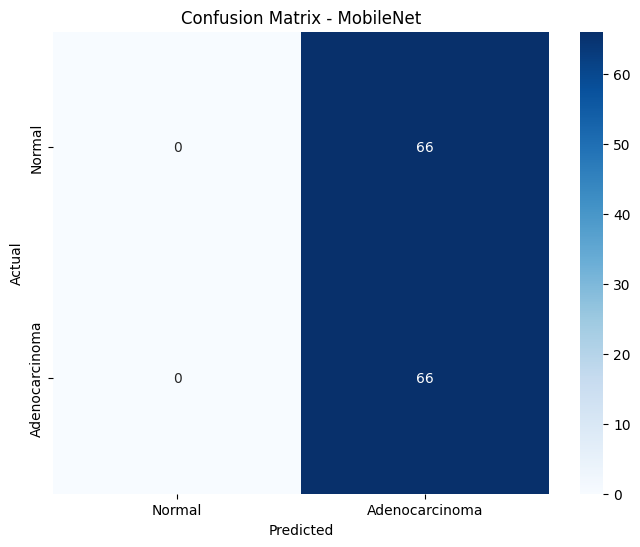

Classification Report - MobileNet
                precision    recall  f1-score   support

        Normal       0.00      0.00      0.00        66
Adenocarcinoma       0.50      1.00      0.67        66

      accuracy                           0.50       132
     macro avg       0.25      0.50      0.33       132
  weighted avg       0.25      0.50      0.33       132



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


5/5 ━━━━━━━━━━━━━━━━━━━━ 30s 5s/step


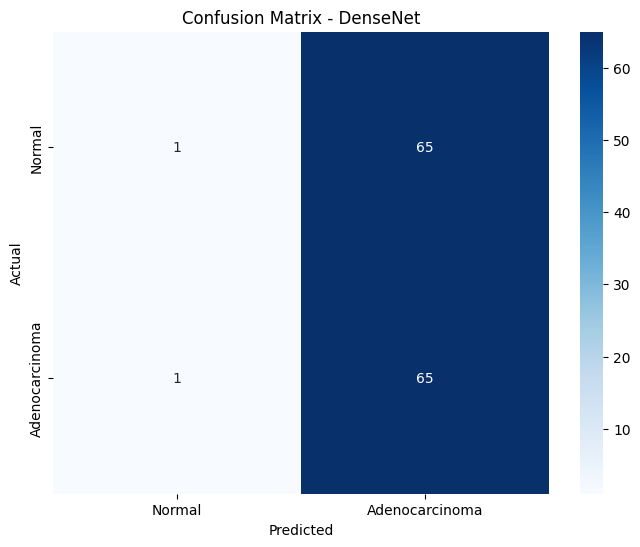

Classification Report - DenseNet
                precision    recall  f1-score   support

        Normal       0.50      0.02      0.03        66
Adenocarcinoma       0.50      0.98      0.66        66

      accuracy                           0.50       132
     macro avg       0.50      0.50      0.35       132
  weighted avg       0.50      0.50      0.35       132



In [ ]:
# Evaluasi pada data test untuk MobileNet
Y_pred_mobilenet = model_mobilenet.predict(test_generator)
y_pred_mobilenet = np.argmax(Y_pred_mobilenet, axis=1)

# Confusion matrix untuk MobileNet
cm_mobilenet = confusion_matrix(test_generator.classes, y_pred_mobilenet)
cm_plot_labels = ['Normal', 'Adenocarcinoma']

# Plot confusion matrix untuk MobileNet
plt.figure(figsize=(8, 6))
sns.heatmap(cm_mobilenet, annot=True, fmt="d", cmap='Blues', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MobileNet')
plt.show()

# Classification report untuk MobileNet
print('Classification Report - MobileNet')
print(classification_report(test_generator.classes, y_pred_mobilenet, target_names=cm_plot_labels))

# Evaluasi pada data test untuk DenseNet
Y_pred_densenet = model_densenet.predict(test_generator)
y_pred_densenet = np.argmax(Y_pred_densenet, axis=1)

# Confusion matrix untuk DenseNet
cm_densenet = confusion_matrix(test_generator.classes, y_pred_densenet)

# Plot confusion matrix untuk DenseNet
plt.figure(figsize=(8, 6))
sns.heatmap(cm_densenet, annot=True, fmt="d", cmap='Blues', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - DenseNet')
plt.show()

# Classification report untuk DenseNet
print('Classification Report - DenseNet')
print(classification_report(test_generator.classes, y_pred_densenet, target_names=cm_plot_labels))
